## LinearRegression : 당뇨 진행 상황 예측 

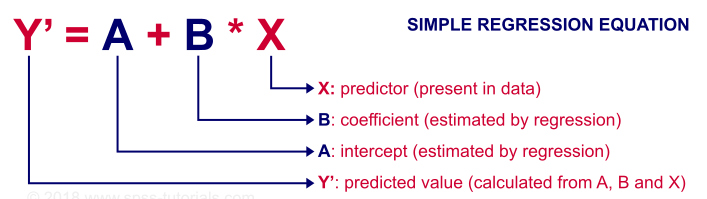

- 출처 : ```https://www.spss-tutorials.com/simple-linear-regression/comment-page-1/```

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.metrics import r2_score

### 1) 데이터 세트 준비


In [ ]:
# sklearn 에서 기본 제공하고 있는 데이터 활용
diabetes = datasets.load_diabetes()

In [ ]:
# diabetes의 type을 확인한다
print(type(diabetes))

<class 'sklearn.utils.Bunch'>


In [ ]:
# Bunch는 dict 객체처럼 key:value 로 데이터를 가지고 있고, key를 사용하여 value를 가져올 수 있다.
# diabetes에 포함된 key의 목록을 확인한다
diabetes.keys()
#'data' : 샘플 데이터, Numpy 배열
#'target' : 레이블 데이터, Numpy 배열
#'DESCR' : 데이터 셋에 대한 전체 설명
#'feature_names' : 샘플 데이터 특성 이름, 컬럼 이름
#'data_filename' : 데이터 저장 파일 위치, csv.gz
#'target_filename' : 데이터 저장 파일 위치, csv.gz

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [ ]:
# diabetes의 key중에 DESCR을 출력해 '데이터 셋'에 대한 '전체 설명'을 확인한다
print(diabetes['DESCR'])

In [ ]:
# nomalize를 사용하여 데이터 정규화 진행
X = normalize(diabetes['data'])
# Y는 결과이므로 정규화를 진행하면 안됨!!
Y = diabetes['target']

In [ ]:
# 데이터의 shape 확인
print(X.shape, Y.shape)

(442, 10) (442,)


## 2) Training/Test Set 나누기


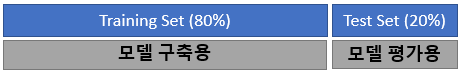

In [ ]:
# train과 test dataset으로 데이터 분할

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## 3) Linear Regression Modeling

In [ ]:
# linear regression 실행
linear = LinearRegression()

# training set로 학습 진행
linear.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 4) Linear Regression Model 성능 평가


In [ ]:
# test set로 결과 확인

# X_test 값을 기반으로 모델을 통한 예측된 Y 결과 (preds_linear)를 얻어냄
preds_linear = linear.predict(X_test)

In [ ]:
# correlation을 통한 상관관계 확인
corr_linear = pd.Series(preds_linear).corr(pd.Series(Y_test))

# r2_score 를 통해 모델의 성능 확인
# Y_test값과 preds_linear의 값을 비교하여 실제로 어느 정도 차이가 나는지 확인함
rsquared_linear = r2_score(Y_test, preds_linear)

In [ ]:
corr_linear

0.6501407198578156

In [ ]:
rsquared_linear

0.41987193879661044

## 5) 결과 확인

In [ ]:
# 10개의 feature의 모델에 대한 영향력 확인
print(f'선형 계수 :\n{linear.coef_}')

선형 계수 :
[ 10.19951023 -29.01141869  85.57629569  37.25972765  38.14919496
 -45.24343547 -45.18966929  29.01040808  53.206844     3.8287644 ]


In [ ]:
linear.intercept_

154.44394622945276

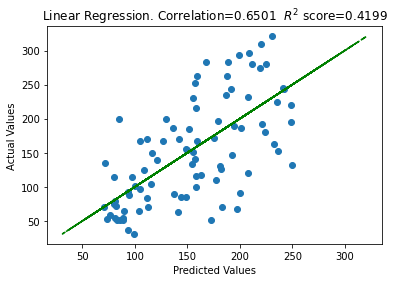

In [ ]:
# 결과를 그림으로 표현
plt.scatter(preds_linear, Y_test)
plt.title(f"Linear Regression. Correlation={corr_linear:.4f}  $R^2$ score={rsquared_linear:.4f}")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

# 비교를 위한 x=y 라인 추가
plt.plot(Y_test, Y_test, 'g--')
plt.show()

## 06) 생각해 봅시다
- training 을 여러번 실행해 보세요!
   - 결과가 같은가요?

In [ ]:
# sklearn 에서 기본 제공하고 있는 데이터 활용
diabetes = datasets.load_diabetes()
# nomalize를 사용하여 데이터 정규화 진행
X = normalize(diabetes['data'])
# Y는 결과이므로 정규화를 진행하면 안됨!!
Y = diabetes['target']

In [ ]:
def do_LinearRegression():
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    linear = LinearRegression()
    linear.fit(X_train, Y_train)
    preds_linear = linear.predict(X_test)
    corr_linear = pd.Series(preds_linear).corr(pd.Series(Y_test))
    rsquared_linear = r2_score(Y_test, preds_linear)
    print(f"Linear Regression. Correlation={corr_linear:.4f}  R^2 score={rsquared_linear:.4f}")

In [ ]:
for x in range(10):
    do_LinearRegression()

Linear Regression. Correlation=0.7287  $R^2$ score=0.5258
Linear Regression. Correlation=0.7100  $R^2$ score=0.4964
Linear Regression. Correlation=0.5264  $R^2$ score=0.2019
Linear Regression. Correlation=0.7687  $R^2$ score=0.5871
Linear Regression. Correlation=0.6248  $R^2$ score=0.3806
Linear Regression. Correlation=0.6082  $R^2$ score=0.3477
Linear Regression. Correlation=0.7328  $R^2$ score=0.5305
Linear Regression. Correlation=0.7314  $R^2$ score=0.5257
Linear Regression. Correlation=0.6863  $R^2$ score=0.4564
Linear Regression. Correlation=0.6873  $R^2$ score=0.4724
